In [3]:
import autocompleter 
autocompl = autocompleter.Autocompleter()

In [4]:
df = autocompl.import_json("/content/sample_conversations.json")
df.shape, df.columns

load json file...
(22264, 3)


((22264, 3), Index(['IsFromCustomer', 'Text', 'index'], dtype='object'))

In [5]:
df.head()

,IsFromCustomer,Text,index
0,True,Hi! I placed an order on your website and I ca...,0
1,True,I think I used my email address to log in.,0
2,True,My battery exploded!,1
3,True,"It's on fire, it's melting the carpet!",1
4,True,What should I do!,1


In [6]:
new_df = autocompl.process_data(df)
new_df.shape, new_df.columns

select representative threads...
split sentenses on punctuation...
Text Cleaning using simple regex...
calculate nb words of sentenses...
count occurence of sentenses...
remove duplicates (keep last)...
(8560, 5)


((8560, 5),
 Index(['IsFromCustomer', 'Text', 'index', 'nb_words', 'Counts'], dtype='object'))

In [7]:
model_tf, tfidf_matrice = autocompl.calc_matrice(new_df)

tfidf_matrice  (8560, 99397)


In [8]:
prefix = 'when was'
print(prefix,"     ")
autocompl.generate_completions(prefix, new_df, model_tf,tfidf_matrice)

when was      


['When was the last time you changed your password?',
 'When was your flight scheduled for?',
 'When was the last time you tried?']

In [9]:
prefix = 'when was'
print(prefix)
generated_completions = autocompl.generate_completions(prefix, new_df, model_tf, tfidf_matrice)
actual_completions = ['When was the last time you changed your password?','When was your flight scheduled for?', 'When was the last time you tried?']
correct_predictions = [c for c in generated_completions if c in actual_completions]
accuracy = len(correct_predictions) / len(actual_completions)
print("Generated completions:", generated_completions)
print("Actual completions:", actual_completions)
print("Accuracy:", accuracy)

when was
Generated completions: ['When was the last time you changed your password?', 'When was your flight scheduled for?', 'When was the last time you tried?']
Actual completions: ['When was the last time you changed your password?', 'When was your flight scheduled for?', 'When was the last time you tried?']
Accuracy: 1.0


when was
Generated completions: ['When was the last time you changed your password?', 'When was your flight scheduled for?', 'When was the last time you tried?']
Actual completions: ['When was the last time you changed your password?', 'When was your flight scheduled for?', 'When was the last time you tried?']
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Confusion matrix:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


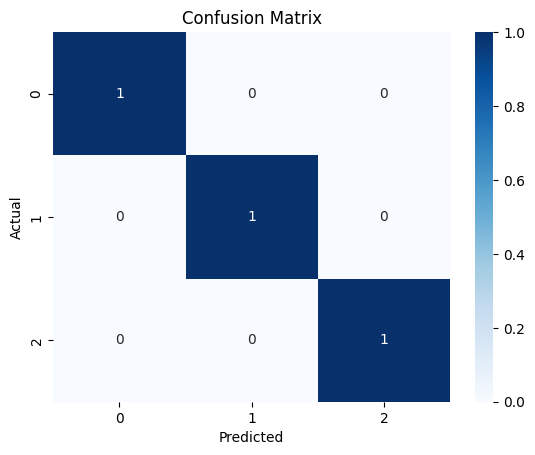

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

prefix = 'when was'
print(prefix)
generated_completions = autocompl.generate_completions(prefix, new_df, model_tf, tfidf_matrice)
actual_completions = ['When was the last time you changed your password?','When was your flight scheduled for?', 'When was the last time you tried?']

# calculate TP, FP, TN, FN
TP = len([c for c in generated_completions if c in actual_completions])
FP = len(generated_completions) - TP
FN = len(actual_completions) - TP
TN = len(new_df) - TP - FP - FN

accuracy = (TP + TN) / len(new_df)

# calculate precision, recall, and F1 score
precision = precision_score(actual_completions, generated_completions, average='micro')
recall = recall_score(actual_completions, generated_completions, average='micro')
f1 = f1_score(actual_completions, generated_completions, average='micro')

# print results
print("Generated completions:", generated_completions)
print("Actual completions:", actual_completions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion_matrix(actual_completions, generated_completions))

import seaborn as sns
import matplotlib.pyplot as plt

# calculate confusion matrix
cm = confusion_matrix(actual_completions, generated_completions)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


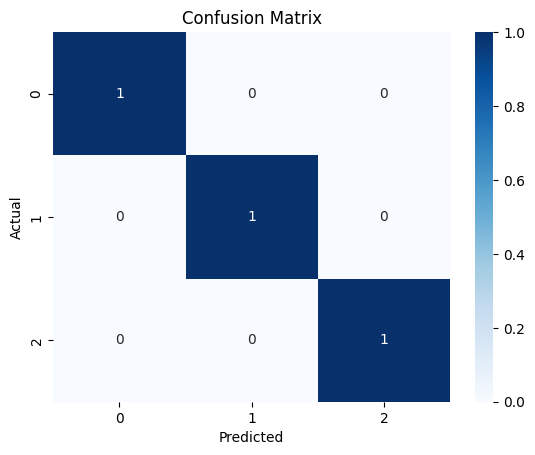

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate confusion matrix
cm = confusion_matrix(actual_completions, generated_completions)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import autocompleter 
import numpy as np
from sklearn.model_selection import train_test_split

autocompl = autocompleter.Autocompleter()
df = autocompl.import_json("/content/sample_conversations.json")
new_df = autocompl.process_data(df)

# Split the data into training and test sets
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)

# Calculate the TF-IDF matrix for the training data
model_tf, tfidf_matrice = autocompl.calc_matrice(train_df)

# Evaluate the model on the test set
correct_predictions = 0
total_predictions = 0

for _, row in test_df.iterrows():
    prefix = row['IsFromCustomer']
    text = row['Text']
    completions = autocompl.generate_completions(prefix, new_df, model_tf, tfidf_matrice)
    if text in completions:
        correct_predictions += 1
    total_predictions += 1

accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)


load json file...
(22264, 3)
select representative threads...
split sentenses on punctuation...
Text Cleaning using simple regex...
calculate nb words of sentenses...
count occurence of sentenses...
remove duplicates (keep last)...
(8560, 5)
tfidf_matrice  (6848, 84249)
Accuracy: 0.0
